In [ ]:
!pip install tweepy

In [ ]:
import tweepy
import pandas as pd

# Twitter API credentials
API_KEY = "bqAdSkbkjxeIqa8hyMTLvmyik"
API_SECRET = "TkAIxEBbUQ8YVvzJOvSLz382wwJTswM3hHwTk29Vt5bGTLymvh"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAAXBzgEAAAAAq2gSCf1l14I9oQExR0tv9VtfMj0%3DchDTRc7rytUJNVVk5eRDGlZIO5tc1LAbDOEJlHlPnlLEMnA3CS"

# Authenticate with Twitter API
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Define the search query
query = "US Elections 2024 (Trump OR Biden OR Democrat OR Republican) -is:retweet lang:en"

# Fetch tweets
tweets = client.search_recent_tweets(query=query, tweet_fields=["created_at"], max_results=100)

# Store tweets in DataFrame
data = []
for tweet in tweets.data:
    data.append([tweet.id, tweet.created_at, tweet.text])

df = pd.DataFrame(data, columns=["Tweet_ID", "Created_At", "Text"])

# Save to CSV
df.to_csv("us_elections_2024_tweets.csv", index=False)

# Display first few tweets
df.head()


,Tweet_ID,Created_At,Text
0,1896542472110846287,2025-03-03 12:45:36+00:00,@DonaldJTrumpJr this will lead to US fixing ou...
1,1896481257862881603,2025-03-03 08:42:21+00:00,@truegurufarino @PStyle0ne1 Trump's US would n...
2,1896465243745947972,2025-03-03 07:38:43+00:00,@RobManess Legacy Media &amp; all Western lea...
3,1896423387578437643,2025-03-03 04:52:24+00:00,@RosebudBubbs @defense_civil25 US president ca...
4,1896419520757092715,2025-03-03 04:37:02+00:00,US Presidential Elections 2024: Ukraine denies...


In [ ]:
from google.colab import files
files.download("us_elections_2024_tweets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)["compound"]
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Text"].apply(get_sentiment)

# Display sentiment distribution
df["Sentiment"].value_counts()


,count
Sentiment,
Positive,44
Negative,36
Neutral,20


<ipython-input-13-bbc3e00e37d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="cubehelix")


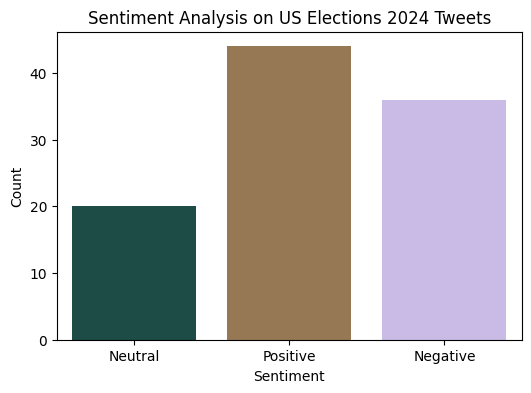

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette="cubehelix")
plt.title("Sentiment Analysis on US Elections 2024 Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


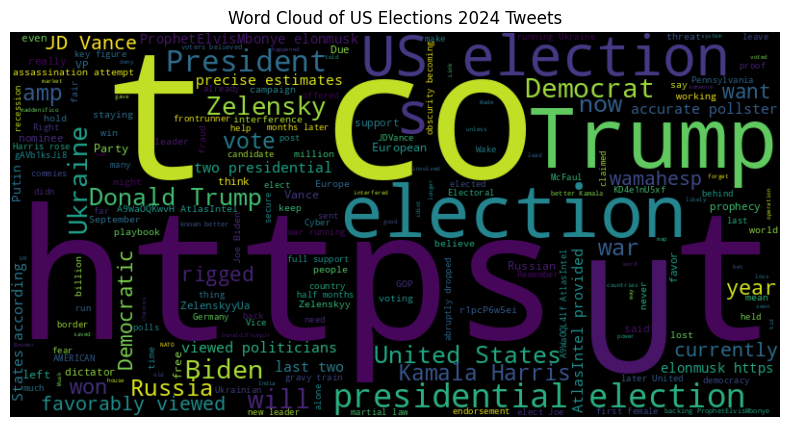

In [ ]:
from wordcloud import WordCloud

text = " ".join(df["Text"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of US Elections 2024 Tweets")
plt.show()


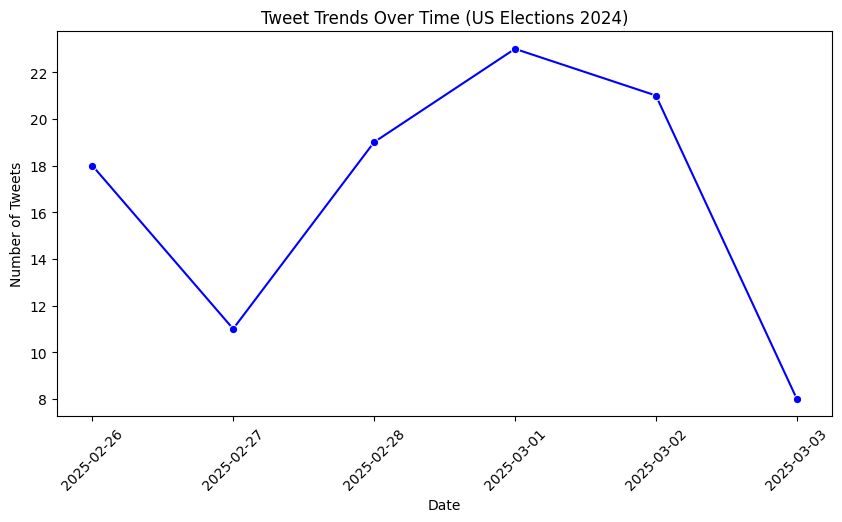

In [ ]:
df["Created_At"] = pd.to_datetime(df["Created_At"])  # Convert to datetime
df["Date"] = df["Created_At"].dt.date  # Extract only date

# Count tweets per day
daily_counts = df.groupby("Date").size().reset_index(name="Tweet_Count")

# Plot trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_counts, x="Date", y="Tweet_Count", marker="o", color="blue")
plt.xticks(rotation=45)
plt.title("Tweet Trends Over Time (US Elections 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()


<ipython-input-14-efafd5f15412>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hashtag_df, x="Count", y="Hashtag", palette="cubehelix")


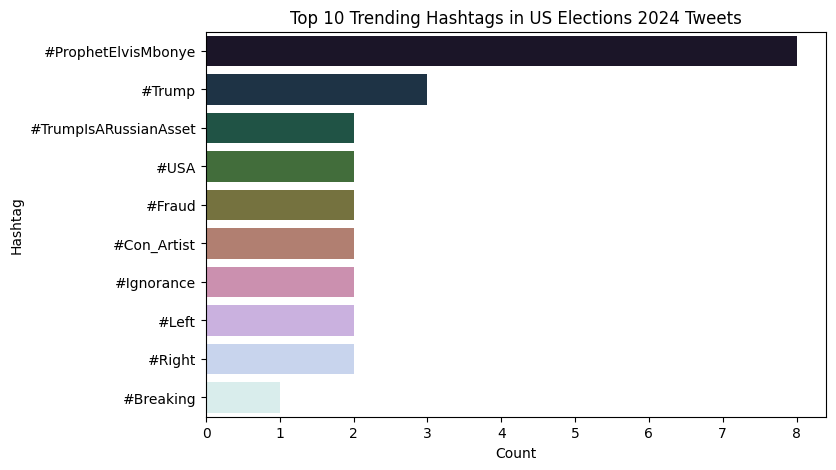

In [ ]:
import re
from collections import Counter

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#\w+", text)

df["Hashtags"] = df["Text"].apply(extract_hashtags)

# Flatten list of hashtags
all_hashtags = [hashtag for hashtags in df["Hashtags"] for hashtag in hashtags]

# Count most common hashtags
hashtag_counts = Counter(all_hashtags).most_common(10)

# Convert to DataFrame
hashtag_df = pd.DataFrame(hashtag_counts, columns=["Hashtag", "Count"])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=hashtag_df, x="Count", y="Hashtag", palette="cubehelix")
plt.title("Top 10 Trending Hashtags in US Elections 2024 Tweets")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()


In [ ]:
df.to_csv("us_elections_sentiment.csv", index=False)


In [ ]:
from google.colab import files
files.download("us_elections_sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>